In [63]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/385.0 MB 11.6 MB/s eta 0:00:34
   ---------------------------------------- 0.8/385.0 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 1.3/385.0 MB 9.4 MB/s eta 0:00:41
   ---------------------------------------- 2.1/385.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 2.5/385.0 MB 9.5 MB/s eta 0:00:41
   ---------------------------------------- 3.0/385.0 MB 9.5 MB/s eta 0:00:41
   ---------------------------------------- 3.5/385.0 MB 9.6 MB/s eta 0:00:40
   ---------------------------------------- 3.9/385.0 MB 9.3 MB/s eta 0:00:43
   ---------------------------------------- 4.1/385.0 MB 8.9 MB/s eta 0:00:43
    --------------------------------------- 5.1/385.0 MB 9.2 MB/s eta 0:

In [206]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style
sns.set(style="whitegrid")


Data Loading

In [199]:
# Load the dataset
df = pd.read_excel('swimclass_rawdata.xlsx')

# Display the first few rows
print("First 5 Rows of the DataFrame:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display information about data types and missing values
print("\nDataFrame Info:")
print(df.info())

First 5 Rows of the DataFrame:
   CHILD_ID  Age_joined  Age_at_last_lesson  REASON FOR LEAVING  \
0         1          57                  57                   1   
1         2           6                   9                   2   
2         3          59                  65                   2   
3         4          29                  29                   0   
4         5          10                  23                   1   

   TOTAL QUANTITY OF LESSONS  PreSchool 1  PreSchool 2  PreSchool 3  \
0                          2            0            0            0   
1                         12            0           12            0   
2                         28            0            0            0   
3                          3            0            0            3   
4                         47            0           20           27   

   PreSchool 4  PreSchool 5  ...  DISCOUNT 1st PAYMENT  Current_member  \
0            2            0  ...                     0           

Data preprocessing - categorical variables need to be encoded.

In [200]:
# Define categorical columns
categorical_cols = [
    'REASON FOR LEAVING',
    'CLASS LEVEL FIRST',
    'CLASS LEVEL LAST'
]

# Define numerical columns by excluding categorical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print("\nCategorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)




Categorical Columns:
['REASON FOR LEAVING', 'CLASS LEVEL FIRST', 'CLASS LEVEL LAST']

Numerical Columns:
['CHILD_ID', 'Age_joined', 'Age_at_last_lesson', 'TOTAL QUANTITY OF LESSONS', 'PreSchool 1', 'PreSchool 2', 'PreSchool 3', 'PreSchool 4', 'PreSchool 5', 'PreSchool 6', 'Academy 1', 'Academy 2', 'Academy 3', 'Academy 4', 'Academy 5', 'Academy 6', 'PreSchool 7', 'BEGINNERS', 'INTERMEDIATE', 'DEVELOPMENT', 'ADVANCED', 'FT BOOKED', 'DISCOUNT 1st PAYMENT', 'Current_member', 'RAF CODE APPLIED', 'SIBLING DISCOUNT APPLIED', 'ONGOING DISCOUNT APPLIED', 'PROMOTIONS APPLIED', 'GOODWILL APPLIED', 'MISCELLANEOUS APPLIED']


use One-Hot Encoding to convert categorical variables into numerical format suitable for machine learning models.

In [201]:
# One-Hot Encode the categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True  # Avoids dummy variable trap
)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())



DataFrame after One-Hot Encoding:
   CHILD_ID  Age_joined  Age_at_last_lesson  TOTAL QUANTITY OF LESSONS  \
0         1          57                  57                          2   
1         2           6                   9                         12   
2         3          59                  65                         28   
3         4          29                  29                          3   
4         5          10                  23                         47   

   PreSchool 1  PreSchool 2  PreSchool 3  PreSchool 4  PreSchool 5  \
0            0            0            0            2            0   
1            0           12            0            0            0   
2            0            0            0            0            0   
3            0            0            3            0            0   
4            0           20           27            0            0   

   PreSchool 6  ...  CLASS LEVEL LAST_2  CLASS LEVEL LAST_3  \
0            0  ...               Fa

Exploratory Data Analysis (EDA)

Perform EDA to understand data distributions, relationships, and potential patterns.

Correlation Matrix
Visualize correlations between numerical features to identify multicollinearity.

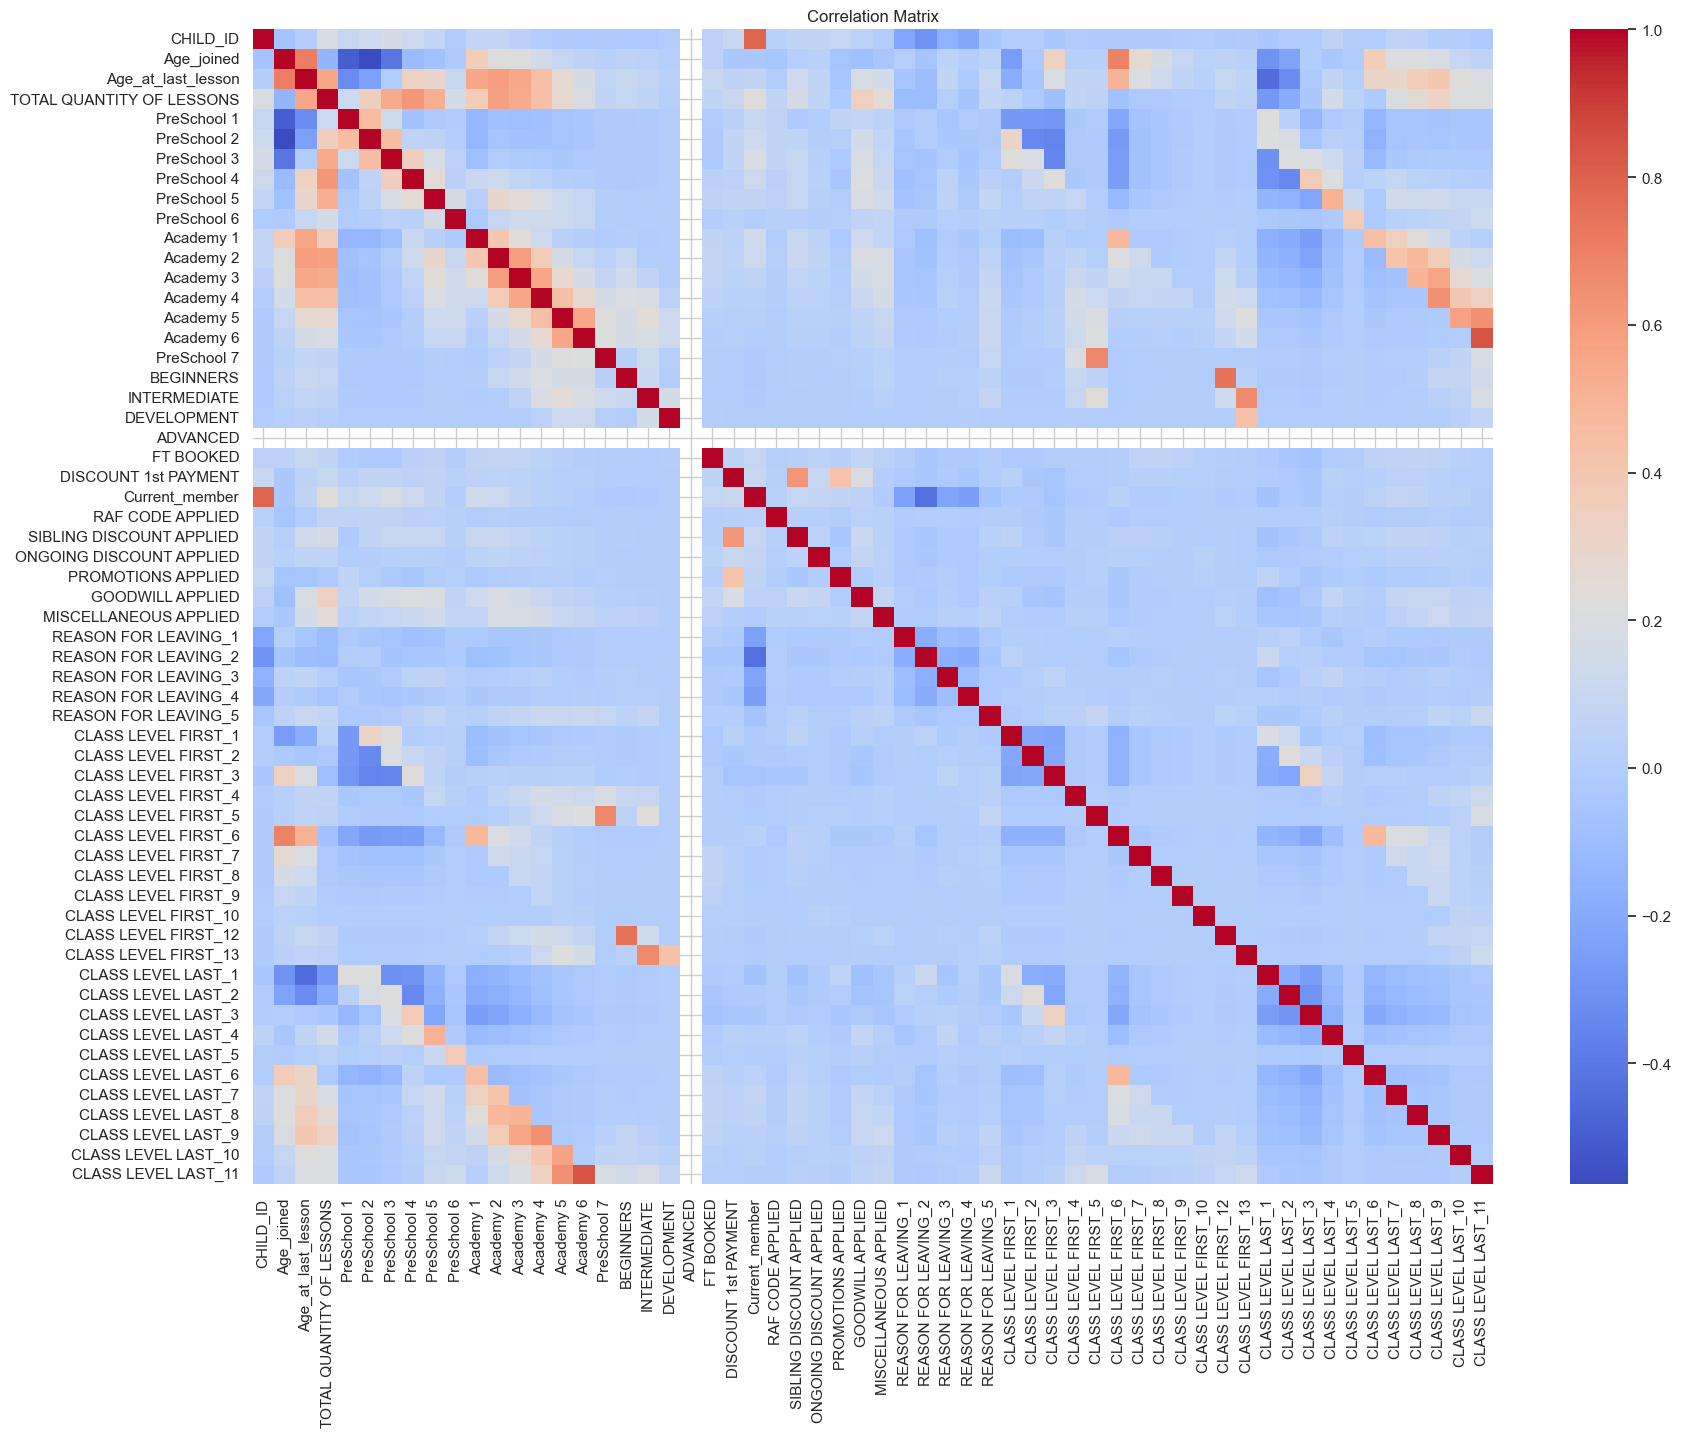

In [202]:
# Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


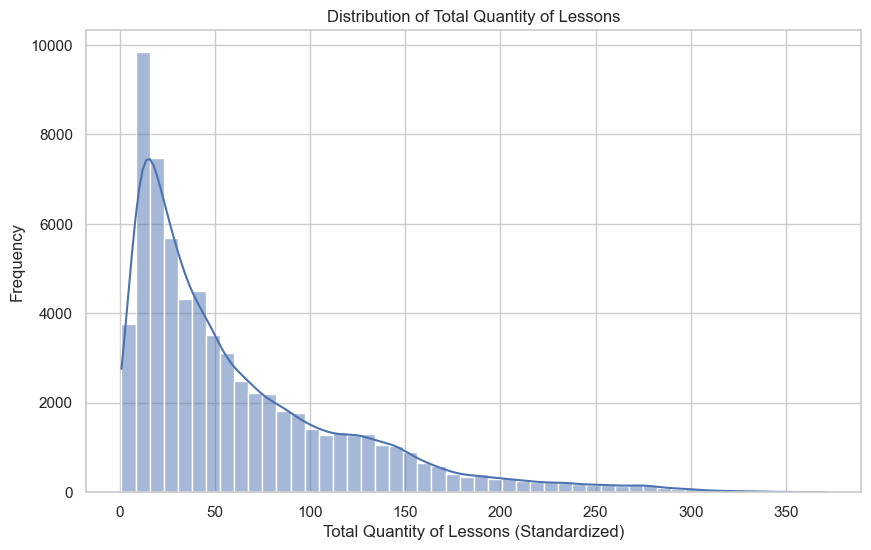

In [203]:
# Distribution of Total Quantity of Lessons
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['TOTAL QUANTITY OF LESSONS'], kde=True, bins=50)
plt.title('Distribution of Total Quantity of Lessons')
plt.xlabel('Total Quantity of Lessons (Standardized)')
plt.ylabel('Frequency')
plt.show()


Scatter Plot: Age_joined vs. Total Quantity of Lessons
Explore the relationship between age at joining and total lessons.

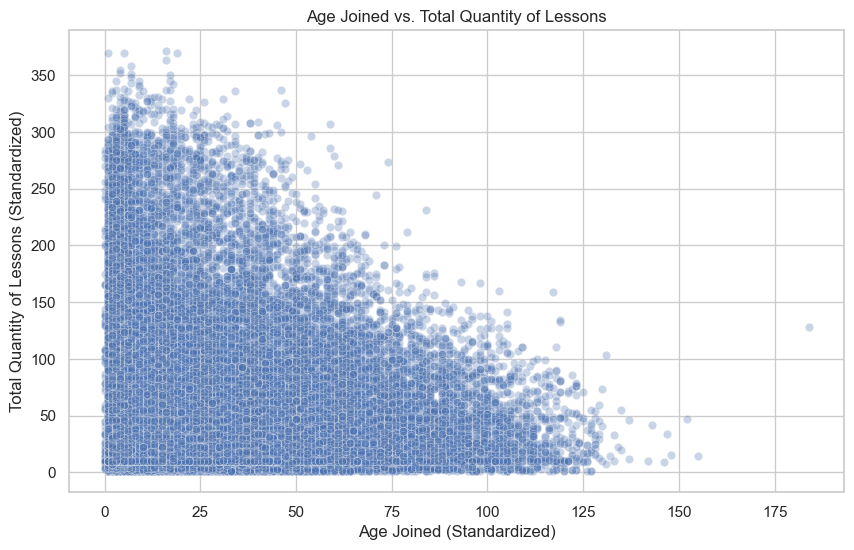

In [204]:
# Scatter Plot: Age_joined vs. Total Quantity of Lessons
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_joined', y='TOTAL QUANTITY OF LESSONS', data=df_encoded, alpha=0.3)
plt.title('Age Joined vs. Total Quantity of Lessons')
plt.xlabel('Age Joined (Standardized)')
plt.ylabel('Total Quantity of Lessons (Standardized)')
plt.show()


Boxplot: Total Quantity of Lessons by Age Group Joined
Assess how total lessons vary across different age groups.

MODEL 1

This workflow enables future lesson predictions for both members who have left and those who are currently active, using a Random Forest regression model based on lesson and discount-related features.

This code:

Data Loading: Loads a dataset of swim class members from an Excel file (swimclass_rawdata.xlsx), where the CHILD_ID is used as the index.

Data Splitting: Divides the data into two subsets:

Leavers (leavers_df): Members who have left the swim class.
Current Members (current_members_df): Members who are still active.
Feature Engineering:

Variance to Median (VTM): For each lesson column, it calculates the variance to the median value for leavers, then applies this to both leavers and current members.
FUTURE_LESSONS: Calculates the future lessons for leavers by subtracting the current total lessons from a maximum lesson value (set as the maximum lessons taken by any leaver).
Model Preparation:

Defines features such as age, lesson-related VTM columns, and discount-related columns for modeling.
Scales the feature values using StandardScaler.
Random Forest Model:

Initializes and trains a Random Forest Regressor model on the leavers' data to predict the FUTURE_LESSONS.
Evaluates the model using Mean Squared Error (MSE) and R-squared on the test set of leavers.
Prediction for Current Members:

Uses the trained model to predict the future lessons for current members.
Adds the predicted future lessons to the current members' data and saves the results to an Excel file for review.

In [207]:
# Step 1: Load the dataset with 'CHILD_ID' as the index
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

# Step 2: Split the data based on 'Current_member'
leavers_df = df[df['Current_member'] == 0]  # Data for members who have left
current_members_df = df[df['Current_member'] == 1]  # Data for current members

# Step 3: Define lesson and discount columns
lesson_columns = [
    'PreSchool 1', 'PreSchool 2', 'PreSchool 3', 'PreSchool 4',
    'PreSchool 5', 'PreSchool 6', 'PreSchool 7', 
    'Academy 1', 'Academy 2', 'Academy 3', 
    'Academy 4', 'Academy 5', 'Academy 6', 
    'BEGINNERS', 'INTERMEDIATE'
]

discount_columns = [
    'SIBLING DISCOUNT APPLIED', 'ONGOING DISCOUNT APPLIED', 'PROMOTIONS APPLIED', 
    'GOODWILL APPLIED', 'MISCELLANEOUS APPLIED', 'RAF CODE APPLIED'
]

# Step 4: Calculate the median for each lesson column (excluding zeros) and create VTM (Variance to Median)
for col in lesson_columns:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values for median calculation
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value     # Calculate the variance to median (VTM)
    current_members_df[f'{col}_VTM'] = current_members_df[col] - median_value  # Apply same median to current members

# Step 5: Calculate FUTURE_LESSONS for leavers (subtract TOTAL_QUANTITY_OF_LESSONS from max lessons possible)
# Here, 'MAX_LESSONS' would be a value representing the theoretical max number of lessons
max_lessons = leavers_df['TOTAL QUANTITY OF LESSONS'].max()  # Can be set to a constant value if needed
leavers_df['FUTURE_LESSONS'] = max_lessons - leavers_df['TOTAL QUANTITY OF LESSONS']

# Step 6: Define the features for the model (all VTM features and discount columns)
features = ['Age_joined', 'Age_at_last_lesson'] + [f'{col}_VTM' for col in lesson_columns] + discount_columns

# Step 7: Split data for training and testing (on leavers only, using FUTURE_LESSONS)
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 8: Initialize scalers for features
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 9: Initialize and train a RandomForestRegressor (you can switch to XGBoost if preferred)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_scaled, y_train)

# Step 10: Predict for the test set (leavers)
y_pred = forest_reg.predict(X_test_scaled)

# Step 11: Evaluate the model's performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Leavers: {mse}")
print(f"R-squared on Leavers: {r2}")

# Step 12: Now predict FUTURE_LESSONS for current members
X_current_members = current_members_df[features]
X_current_members_scaled = feature_scaler.transform(X_current_members)

# Predict for the current members
current_members_future_lessons = forest_reg.predict(X_current_members_scaled)

# Step 13: Add the predicted future lessons to the current members dataframe
current_members_df['PREDICTED_FUTURE_LESSONS'] = current_members_future_lessons

# Step 14: Save the results to an Excel file for review
current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']].to_excel('current_members_future_lessons.xlsx')

print(current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']].head())


Mean Squared Error on Leavers: 36.434327531523174
R-squared on Leavers: 0.9863654391344472
          TOTAL QUANTITY OF LESSONS  PREDICTED_FUTURE_LESSONS
CHILD_ID                                                     
46                               12                    327.00
51                               64                    276.70
87                               10                    329.00
88                              107                    221.28
132                              68                    267.16


MODEL VERSION 2

This is a modified version of the code above to see if results can be improved -
the updated code adds group-specific ceilings for a more refined FUTURE_LESSONS calculation, introduces cross-validation to prevent overfitting, and ensures that the future lessons are based on more realistic benchmarks for each age group.

FUTURE_LESSONS Calculation:
Previous Code: FUTURE_LESSONS was calculated as the difference between a predefined max_lessons (the maximum lessons taken by any leaver) and the current number of lessons (TOTAL QUANTITY OF LESSONS).
New Code: 

1. FUTURE_LESSONS is calculated based on a group-specific ceiling, which is the 90th percentile of total lessons within an age group. This approach adds more nuance by capping potential lessons based on an age group's realistic ceiling, rather than a universal max.

2. Group-Specific Ceiling:
New Code: Introduces age groups based on Age_at_last_lesson, dividing members into age bins. The 90th percentile of total lessons is calculated within each age group to provide a more appropriate ceiling for future lessons.

3. Cross-Validation:
Previous Code: Directly trains the Random Forest Regressor without cross-validation.
New Code: Implements k-fold cross-validation with 5 splits to evaluate the Random Forest model’s performance during training, calculating the mean of the negative MSE across folds. This step helps in assessing the model's generalization performance before final training.

4. Scaling:
Both Codes: Use StandardScaler to scale the features. However, the new code clearly separates the scaling process and cross-validation before training the final model.

5. Evaluation:
Both Codes: Evaluate the model using Mean Squared Error (MSE) and R-squared on the test set (for leavers).

6. Output and Saving Results:
Both Codes: Predict future lessons for current members and save the results, including a comparison of TOTAL QUANTITY OF LESSONS and PREDICTED_FUTURE_LESSONS, to an Excel file.

In [ ]:
#OPTIONAL
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
#OPTIONAL IF LOADED ABOVE
# Step 1: Load the dataset with 'CHILD_ID' as the index
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [175]:
# Step 2: Split the data based on 'Current_member'
leavers_df = df[df['Current_member'] == 0]  # Data for members who have left
current_members_df = df[df['Current_member'] == 1]  # Data for current members

# Step 3: Define lesson and discount columns
lesson_columns = [
    'PreSchool 1', 'PreSchool 2', 'PreSchool 3', 'PreSchool 4',
    'PreSchool 5', 'PreSchool 6', 'PreSchool 7', 
    'Academy 1', 'Academy 2', 'Academy 3', 
    'Academy 4', 'Academy 5', 'Academy 6', 
    'BEGINNERS', 'INTERMEDIATE'
]

discount_columns = [
    'SIBLING DISCOUNT APPLIED', 'ONGOING DISCOUNT APPLIED', 'PROMOTIONS APPLIED', 
    'GOODWILL APPLIED', 'MISCELLANEOUS APPLIED', 'RAF CODE APPLIED'
]

# Step 4: Calculate the median for each lesson column (excluding zeros) and create VTM (Variance to Median)
for col in lesson_columns:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values for median calculation
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value     # Calculate the variance to median (VTM)
    current_members_df[f'{col}_VTM'] = current_members_df[col] - median_value  # Apply same median to current members

# Step 5: Define the features for the model (all VTM features and discount columns)
features = ['Age_joined', 'Age_at_last_lesson'] + [f'{col}_VTM' for col in lesson_columns] + discount_columns

# Step 6: Create age groups to calculate the ceiling for future lessons
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])

# Calculate the 90th percentile ceiling within each age group
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)

# Apply the ceiling to each member based on their group
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Calculate FUTURE_LESSONS based on the group-specific ceiling
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Split data for training and testing (on leavers only)
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 8: Initialize scalers for features
feature_scaler = StandardScaler()

# Step 9: Fit and transform the feature scaler on the training data, then transform the test data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 10: Implement Random Forest Regressor (with cross-validation)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply k-fold cross-validation to evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse = np.mean(-cv_scores)
print(f"Cross-Validated MSE: {cv_mse}")

# Step 11: Train the Random Forest model
random_forest_reg.fit(X_train_scaled, y_train)

# Step 12: Predict for the test set (leavers)
y_pred = random_forest_reg.predict(X_test_scaled)

# Step 13: Evaluate the model's performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Leavers: {mse}")
print(f"R-squared on Leavers: {r2}")

# Step 14: Now predict future lessons for the current members
X_current_members = current_members_df[features]
X_current_members_scaled = feature_scaler.transform(X_current_members)

# Predict for the current members
current_members_pred = random_forest_reg.predict(X_current_members_scaled)

# Step 15: Add the predicted future lessons to the current members dataframe
current_members_df['PREDICTED_FUTURE_LESSONS'] = current_members_pred

# Step 16: Compare TOTAL QUANTITY OF LESSONS to PREDICTED_FUTURE_LESSONS for the current members
comparison_df = current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']]
comparison_df['DIFFERENCE'] = comparison_df['PREDICTED_FUTURE_LESSONS'] - comparison_df['TOTAL QUANTITY OF LESSONS']

# Save the results to an Excel file for review
comparison_df.to_excel('current_members_predicted_future_lessons.xlsx')

print(comparison_df.head())


Cross-Validated MSE: 1.9802330833034862
Mean Squared Error on Leavers: 2.3130191993679214
R-squared on Leavers: 0.9848613306181653
          TOTAL QUANTITY OF LESSONS  PREDICTED_FUTURE_LESSONS  DIFFERENCE
CHILD_ID                                                                 
46                               12                     13.00        1.00
51                               64                     46.02      -17.98
87                               10                     47.10       37.10
88                              107                     47.10      -59.90
132                              68                     47.10      -20.90


MODEL 3

Target Scaling: The new code uses StandardScaler to scale both features and the target (FUTURE_LESSONS), which is not done in the previous code.
Prediction Scaling: After predicting, the new code reverses the scaling to bring the predictions back to their original scale.
Cross-Validation on Scaled Targets: Cross-validation is performed on scaled target values in the new code, providing more consistency during training and evaluation.
Handling Predicted Future Lessons: The new code carefully handles scaling both for current members' predictions and leavers' predictions.
These changes provide more control and robustness to the model's performance, especially when working with datasets that have large ranges in the target variable (FUTURE_LESSONS).

The primary difference between this code and the previous versions is the inclusion of target scaling and a few other important steps that improve the model's performance and provide more flexibility in predictions. Here's a breakdown of the differences:

1. Target Scaling
New Code: Scales the target (FUTURE_LESSONS) in the training and test sets using StandardScaler. This ensures that the model is trained on scaled values, making the predictions and training process more stable and less prone to the varying scales of the data. After making predictions, the code reverses the scaling for both predictions and actual target values.
Previous Code: No scaling was applied to the target variable. Only the features were scaled.

2. Target and Prediction Scaling Reversal
New Code: After the predictions (y_pred_scaled) are made by the model, the scaling is reversed using the target scaler (target_scaler.inverse_transform). This ensures that the predicted and actual values are returned to their original scales, making the evaluation with metrics like MSE and R-squared more accurate.
Previous Code: Did not use scaling reversal for the target. The predictions were made on the original scale.

3. Cross-Validation
Both Codes: Apply cross-validation using KFold to evaluate the Random Forest model. However, in the new code, the cross-validation is done on the scaled target values (y_train_scaled), ensuring the same scaling is applied consistently throughout the model evaluation process.

4. Prediction for Current Members
New Code: Predictions for future lessons of current members are also made using the scaled target (current_members_pred_scaled). After the predictions are made, they are reverted to their original scale using target_scaler.inverse_transform, making the results easier to interpret and comparable with the actual lesson counts.
Previous Code: Similar, but without the scaling and reversal, making the predictions potentially harder to interpret directly.

5. Model Training
Both Codes: Train the Random Forest Regressor using similar hyperparameters (n_estimators=100, random_state=42), but in the new code, it operates on scaled target values.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Step 1: Load the dataset with 'CHILD_ID' as the index
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [176]:
# Step 2: Split the data based on 'Current_member'
leavers_df = df[df['Current_member'] == 0]  # Data for members who have left
current_members_df = df[df['Current_member'] == 1]  # Data for current members

# Step 3: Define lesson and discount columns
lesson_columns = [
    'PreSchool 1', 'PreSchool 2', 'PreSchool 3', 'PreSchool 4',
    'PreSchool 5', 'PreSchool 6', 'PreSchool 7', 
    'Academy 1', 'Academy 2', 'Academy 3', 
    'Academy 4', 'Academy 5', 'Academy 6', 
    'BEGINNERS', 'INTERMEDIATE'
]

discount_columns = [
    'SIBLING DISCOUNT APPLIED', 'ONGOING DISCOUNT APPLIED', 'PROMOTIONS APPLIED', 
    'GOODWILL APPLIED', 'MISCELLANEOUS APPLIED', 'RAF CODE APPLIED'
]

# Step 4: Calculate the median for each lesson column (excluding zeros) and create VTM (Variance to Median)
for col in lesson_columns:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values for median calculation
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value     # Calculate the variance to median (VTM)
    current_members_df[f'{col}_VTM'] = current_members_df[col] - median_value  # Apply same median to current members

# Step 5: Dynamically adjust the ceiling based on the 90th percentile of total lessons for each age group

# Create age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])

# Calculate the 90th percentile ceiling within each age group
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)

# Apply the ceiling to each member based on their group
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Calculate FUTURE_LESSONS based on the group-specific ceiling
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 6: Define the features for the model (all VTM features and discount columns)
features = ['Age_joined', 'Age_at_last_lesson'] + [f'{col}_VTM' for col in lesson_columns] + discount_columns

# Step 7: Split data for training and testing (on leavers only)
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 8: Initialize scalers for features and target
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Step 9: Fit and transform the feature scaler on the training data, then transform the test data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 10: Fit and transform the target scaler on the training data, then transform the test data
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Step 11: Train the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply k-fold cross-validation to evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train_scaled.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_mse = np.mean(-cv_scores)
print(f"Cross-Validated MSE: {cv_mse}")

# Step 12: Train the Random Forest model
rf_regressor.fit(X_train_scaled, y_train_scaled.ravel())

# Step 13: Predict for the test set (leavers)
y_pred_scaled = rf_regressor.predict(X_test_scaled)

# Step 14: Reverse the scaling for the predictions and actual target values
y_pred_actual = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Reverse scaling on predictions
y_test_actual = target_scaler.inverse_transform(y_test_scaled)  # Reverse scaling on actual test values

# Step 15: Evaluate the model's performance using MSE and R-squared
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error on Leavers: {mse}")
print(f"R-squared on Leavers: {r2}")

# Step 16: Now predict on the current members
X_current_members = current_members_df[features]
X_current_members_scaled = feature_scaler.transform(X_current_members)

# Predict for the current members
current_members_pred_scaled = rf_regressor.predict(X_current_members_scaled)

# Reverse the scaling to get the actual predicted future lessons
current_members_pred_actual = target_scaler.inverse_transform(current_members_pred_scaled.reshape(-1, 1))

# Step 17: Add the predicted future lessons to the current members dataframe
current_members_df['PREDICTED_FUTURE_LESSONS'] = current_members_pred_actual

# Step 18: Save the results to an Excel file for review
current_members_df.to_excel('current_members_predicted_future_lessons.xlsx')

print(current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']].head())


Cross-Validated MSE: 0.012888454500102137
Mean Squared Error on Leavers: 2.339875217276798
R-squared on Leavers: 0.9846855584602229
          TOTAL QUANTITY OF LESSONS  PREDICTED_FUTURE_LESSONS
CHILD_ID                                                     
46                               12                     13.00
51                               64                     45.77
87                               10                     46.94
88                              107                     46.94
132                              68                     46.94


In [ ]:
MODEL 4

Using XG Boost
This code performs a series of operations aimed at evaluating the correlation between features and the target variable, and it then uses XGBoost to identify feature importance. 

The code first calculates and visualizes correlations between numeric features and the target (FUTURE_LESSONS).
It then trains an XGBoost model to predict future lessons and extracts the model’s assessment of which features are most important for prediction.
The result is a better understanding of both linear correlations and feature importance, helping in feature selection and model interpretation.

1. Dropping Non-Numeric Columns and Calculating Correlation Matrix

It selects only numeric columns from leavers_df (excluding categorical or string columns) to calculate the correlation matrix.
Correlation Matrix: This matrix shows the linear relationships between all numeric features, with values between -1 (strong negative correlation) and +1 (strong positive correlation).

2. Correlation with the Target (FUTURE_LESSONS

This code extracts the correlation of each feature with the target variable (FUTURE_LESSONS), sorting them in descending order.
Output: It prints out which features are most correlated (either positively or negatively) with FUTURE_LESSONS. Higher absolute values of correlation indicate stronger relationships.


3. Plotting the Correlation Heatmap


This step generates a heatmap to visually represent the correlation matrix. It helps you see at a glance which features are strongly correlated with each other or with the target (FUTURE_LESSONS).
Visualization: The sns.heatmap uses color gradients to represent the correlation values, making it easy to identify both positive and negative correlations.

4. Training XGBoost to Identify Feature Importance

It trains an XGBoost regression model using the training data (X_train_scaled and y_train) to predict FUTURE_LESSONS.
XGBoost: This model provides feature importance scores as part of the output, which helps identify which features are most important for making predictions.

5. Extracting and Sorting Feature Importance

This extracts the feature importance scores from the trained XGBoost model, storing them in a pandas.Series with feature names as the index.
Sorting: The importance scores are sorted in descending order, showing the most important features at the top.
Output: It prints out the feature importance scores, giving insight into which features the model relies on most when making predictions.

6. Plotting Feature Importance

This generates a bar plot to visually display the feature importance scores. It helps to see at a glance which features contribute most to the model's predictions.
Visualization: The plot provides a clear ranking of feature importance, with the most important features appearing at the top

In [ ]:
#OPRIONAL
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

Correlation with FUTURE_LESSONS:
 FUTURE_LESSONS               1.000000
Age_joined                   0.900943
CLASS LEVEL FIRST            0.700566
group_ceiling                0.499077
Age_at_last_lesson           0.437485
CLASS LEVEL LAST             0.371338
PreSchool 3                  0.192983
PreSchool 3_VTM              0.192983
SIBLING DISCOUNT APPLIED     0.024384
PreSchool 4                 -0.003141
PreSchool 4_VTM             -0.003141
Academy 4_VTM               -0.004610
Academy 4                   -0.004610
FT BOOKED                   -0.008893
ONGOING DISCOUNT APPLIED    -0.011258
PROMOTIONS APPLIED          -0.012323
DISCOUNT 1st PAYMENT        -0.014426
PreSchool 5_VTM             -0.042133
PreSchool 5                 -0.042133
RAF CODE APPLIED            -0.042152
GOODWILL APPLIED            -0.073352
REASON FOR LEAVING          -0.078066
PreSchool 2_VTM             -0.255932
PreSchool 2                 -0.255932
TOTAL QUANTITY OF LESSONS   -0.449526
PreSchool 1_VTM 

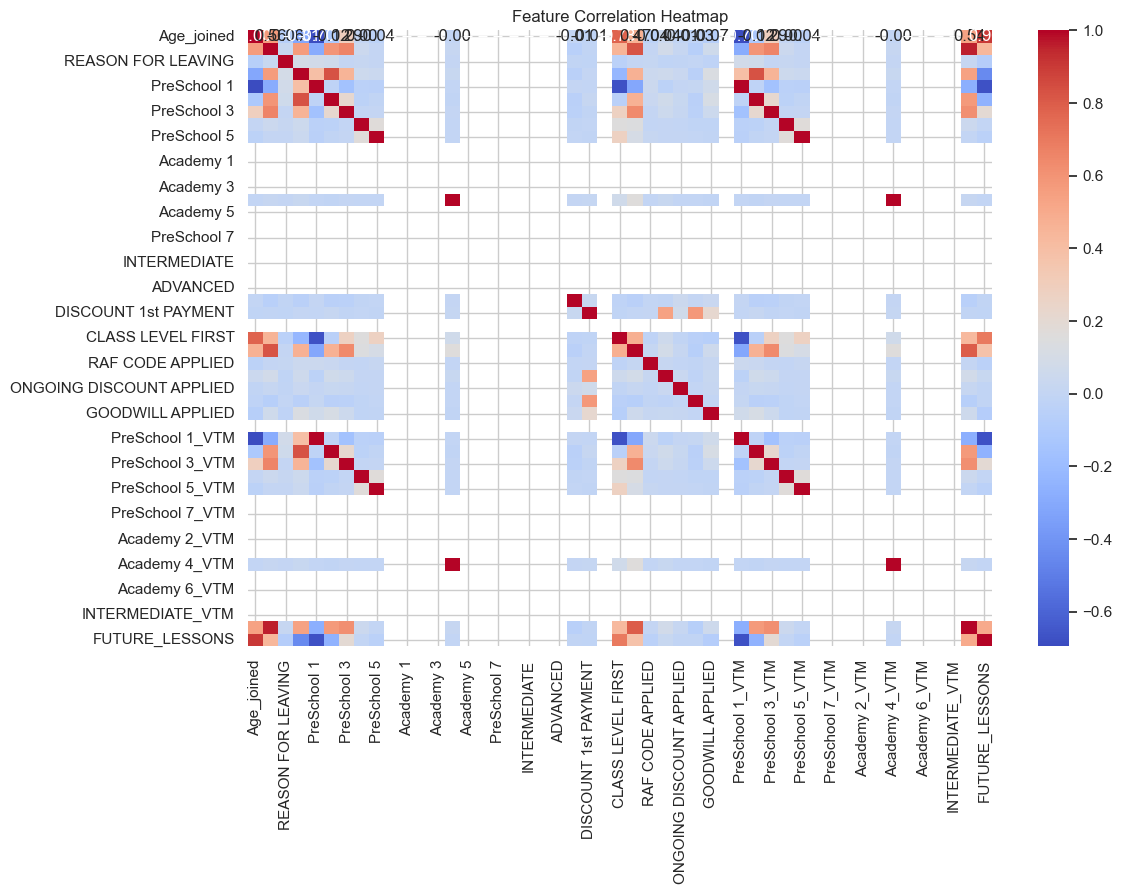

Feature Importances:
 Age_joined                  0.756848
Age_at_last_lesson          0.065181
PreSchool 1_VTM             0.059635
PreSchool 2_VTM             0.057552
PreSchool 3_VTM             0.028936
PreSchool 5_VTM             0.014343
PreSchool 4_VTM             0.008070
Academy 4_VTM               0.005568
SIBLING DISCOUNT APPLIED    0.001774
PROMOTIONS APPLIED          0.000950
GOODWILL APPLIED            0.000492
RAF CODE APPLIED            0.000334
ONGOING DISCOUNT APPLIED    0.000316
Academy 2_VTM               0.000000
Academy 5_VTM               0.000000
Academy 6_VTM               0.000000
BEGINNERS_VTM               0.000000
INTERMEDIATE_VTM            0.000000
Academy 1_VTM               0.000000
PreSchool 7_VTM             0.000000
PreSchool 6_VTM             0.000000
MISCELLANEOUS APPLIED       0.000000
Academy 3_VTM               0.000000
dtype: float32


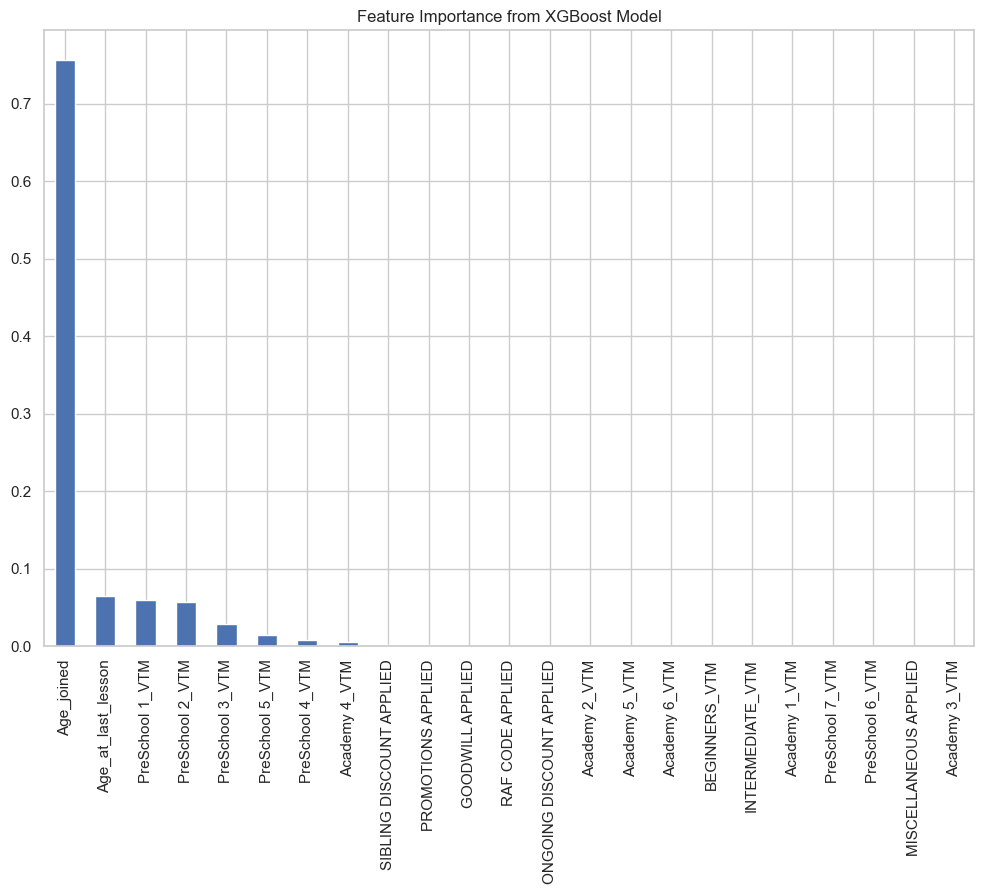

In [178]:
# Step 1: Drop non-numeric columns for correlation
numeric_cols = leavers_df.select_dtypes(include=[float, int]).columns
corr_matrix = leavers_df[numeric_cols].corr()

# Step 2: Correlation with FUTURE_LESSONS
correlation_with_target = corr_matrix['FUTURE_LESSONS'].sort_values(ascending=False)
print("Correlation with FUTURE_LESSONS:\n", correlation_with_target)

# Step 3: Plot the correlation heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Train XGBoost to identify feature importance
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Get feature importance from XGBoost model
feature_importance = pd.Series(xgb_model.feature_importances_, index=features)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importances:\n", feature_importance)

# Step 5: Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title("Feature Importance from XGBoost Model")
plt.show()


MODEL 5

This code builds an XGBoost model to predict the future lessons that members could take, based on factors such as their age, lessons taken, and variance to the median of lesson types. It calculates a group ceiling based on the 90th percentile of lessons for each age group and then predicts future lessons for both leavers and current members. The results are evaluated and saved for review.

This code aims to predict the future lessons a member might take based on past lessons, age groups, and other features, using an XGBoost regression model. Here's a summary of the key steps:

1. Data Loading and Splitting
Loads the dataset (swimclass_rawdata.xlsx) and splits it into leavers (those who left) and current members based on the Current_member column.

2. Feature Engineering: Variance to Median (VTM)
For each lesson-related column, it calculates the median of non-zero values for leavers and creates a VTM (Variance to Median) feature. This is done separately for both leavers and current members.

3. Group Ceiling Calculation
Members are split into age groups based on their age at the last lesson. The 90th percentile of total lessons taken is calculated for each group (leavers) and applied as a ceiling to future lessons for both leavers and current members.

4. FUTURE_LESSONS Calculation
For leavers, future lessons are calculated as the difference between the group ceiling and their current total number of lessons (TOTAL QUANTITY OF LESSONS).

5. Feature Selection
Key features for the model are chosen, including age, class level, total lessons taken, and the VTM features for specific lessons.

6. Data Preparation
The leavers' data is split into training and test sets. The features are scaled using StandardScaler to normalize the data before training the model.

7. XGBoost Model Training
An XGBoost regression model is defined and trained on the scaled training data to predict future lessons for leavers.

8. Model Evaluation
The model is evaluated on the test set of leavers using Mean Squared Error (MSE) and R-squared (R²) scores to assess its performance.

9. Future Predictions for Current Members
The trained model is used to predict the future lessons for current members. These predictions are added to the current members' dataset as a new column.

10. Saving Results
The predicted future lessons for current members are saved to an Excel file for further review, showing both the total lessons taken and the predicted future lessons.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Step 1: Load the dataset with 'CHILD_ID' as the index
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [183]:
# Step 2: Split the data based on 'Current_member'
leavers_df = df[df['Current_member'] == 0]  # Data for members who have left
current_members_df = df[df['Current_member'] == 1]  # Data for current members

# Step 3: Define lesson and discount columns
lesson_columns = [
    'PreSchool 1', 'PreSchool 2', 'PreSchool 3', 'PreSchool 4',
    'PreSchool 5', 'PreSchool 6', 'PreSchool 7', 
    'Academy 1', 'Academy 2', 'Academy 3', 
    'Academy 4', 'Academy 5', 'Academy 6', 
    'BEGINNERS', 'INTERMEDIATE'
]

# Step 4: Calculate the median for each lesson column (excluding zeros) and create VTM (Variance to Median)
for col in lesson_columns:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values for median calculation
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value     # Calculate the variance to median (VTM)
    current_members_df[f'{col}_VTM'] = current_members_df[col] - median_value  # Apply same median to current members

# Step 5: Calculate group ceiling based on 90th percentile for different age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
current_members_df['age_group'] = pd.cut(current_members_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])

# Calculate the 90th percentile ceiling within each age group based on leavers' data
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)

# Apply the ceiling to both leavers and current members
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group', how='left')
current_members_df = current_members_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group', how='left')

# Step 6: Calculate FUTURE_LESSONS based on the group-specific ceiling
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Include TOTAL QUANTITY OF LESSONS (lessons taken to date) as an additional feature
features = [
    'Age_joined', 'CLASS LEVEL FIRST', 'TOTAL QUANTITY OF LESSONS', 'group_ceiling',
    'PreSchool 1_VTM', 'PreSchool 2_VTM', 'PreSchool 3_VTM', 
    'PreSchool 5_VTM', 'PreSchool 4_VTM', 'Academy 4_VTM'
]

# Step 8: Split data for training and testing (on leavers only)
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']  # Predicting FUTURE_LESSONS

# Step 9: Check for NaNs or infinite values in the target
y_leavers = y_leavers.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure that `X_leavers` and `y_leavers` have the same length after dropping NaN values in `y_leavers`
X_leavers = X_leavers.loc[y_leavers.index]

X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 10: Initialize scalers for features
feature_scaler = StandardScaler()

# Step 11: Fit and transform the feature scaler on the training data, then transform the test data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 12: Implement XGBoost
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Step 13: Train the XGBoost model
xgb_reg.fit(X_train_scaled, y_train)

# Step 14: Predict for the test set (leavers)
y_pred = xgb_reg.predict(X_test_scaled)

# Step 15: Evaluate the model's performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Leavers: {mse}")
print(f"R-squared on Leavers: {r2}")

# Step 16: Now predict on the current members (add PREDICTED_FUTURE_LESSONS to their dataset)
X_current_members = current_members_df[features]
X_current_members_scaled = feature_scaler.transform(X_current_members)

# Predict for the current members
current_members_pred = xgb_reg.predict(X_current_members_scaled)

# Step 17: Add the predicted future lessons to the current members dataframe
current_members_df['PREDICTED_FUTURE_LESSONS'] = current_members_pred

# Step 18: Save the results to an Excel file for review
current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']].to_excel('current_members_predicted_future_lessons_with_group_ceiling.xlsx')

print(current_members_df[['TOTAL QUANTITY OF LESSONS', 'PREDICTED_FUTURE_LESSONS']].head())


Mean Squared Error on Leavers: 0.4352743283974135
R-squared on Leavers: 0.9971255941664868
   TOTAL QUANTITY OF LESSONS  PREDICTED_FUTURE_LESSONS
0                         12                 12.906896
1                         64                 23.526987
2                         10                 45.004871
3                        107                 23.167480
4                         68                 24.253277


MODEL 6

This code predicts future lessons for leavers using linear regression, based on key features like age, total lessons taken, and the variance to the median of specific lesson types. The model is trained and evaluated on a portion of the leavers' data, and the results are displayed for comparison.

1. Data Preparation
Splits the dataset into two groups: leavers (those who left) and current members based on the Current_member column.

2. Feature Selection
Selects the following features for modeling:
Age_joined
Age_at_last_lesson
TOTAL QUANTITY OF LESSONS
Variance to Median (VTM) for two columns: PreSchool 1 and PreSchool 2.

3. Calculate VTM (Variance to Median)
Calculates the median of PreSchool 1 and PreSchool 2 for leavers who took more than 0 lessons.
The VTM is calculated as the difference between the number of lessons taken in each category and the median value.

4. Group Ceiling Calculation
Divides leavers into age groups (0-5, 6-10, 11-15, 16-20) based on Age_at_last_lesson.
Calculates the 90th percentile ceiling for total lessons taken within each age group.
Merges this ceiling with the dataset and uses it to define a group ceiling for future lessons.

5. Future Lessons Calculation
Calculates future lessons as the difference between the group ceiling and the actual TOTAL QUANTITY OF LESSONS taken.
Ensures that future lessons cannot be negative by clipping the values.

6. Modeling (Linear Regression)
Splits the data into training and test sets using train_test_split.
Scales the data using StandardScaler to normalize the features.
Trains a linear regression model on the scaled training data.

7. Prediction and Evaluation
Makes predictions for the test set using the trained linear regression model.
Evaluates the model using Mean Squared Error (MSE) and R-squared (R²) to measure the model's performance.

8. Results Analysis
Stores the actual and predicted future lessons in a DataFrame and calculates the difference between them for review.


In [ ]:
#Optional
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Optional
# Step 1: Load dataset
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [187]:
# Step 2: Prepare the data for leavers and current members
leavers_df = df[df['Current_member'] == 0]
current_members_df = df[df['Current_member'] == 1]

# Step 3: Define your features
features = ['Age_joined', 'Age_at_last_lesson', 'TOTAL QUANTITY OF LESSONS'] + [f'{col}_VTM' for col in ['PreSchool 1', 'PreSchool 2']]

# Step 4: Calculate Variance to Median (VTM) for 'PreSchool 1' and 'PreSchool 2'
for col in ['PreSchool 1', 'PreSchool 2']:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value

# Step 5: Calculate the group-specific ceiling (90th percentile) for future lessons within age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Step 6: Prepare the target variable (FUTURE_LESSONS)
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Split data into train and test sets
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']
X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 8: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Step 10: Make predictions and evaluate
y_pred = linear_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")

# Optional: Add predictions to a DataFrame and review
results_df = pd.DataFrame({'Actual_FUTURE_LESSONS': y_test, 'Predicted_FUTURE_LESSONS': y_pred})
results_df['DIFFERENCE'] = results_df['Predicted_FUTURE_LESSONS'] - results_df['Actual_FUTURE_LESSONS']
print(results_df.head())




Linear Regression - Mean Squared Error: 14.60678158105566
Linear Regression - R-squared: 0.9043988752239055
       Actual_FUTURE_LESSONS  Predicted_FUTURE_LESSONS  DIFFERENCE
1236                    18.0                 20.503272    2.503272
9140                    32.0                 25.831893   -6.168107
4991                     3.0                  7.558958    4.558958
5210                     4.0                  5.645971    1.645971
11782                    2.0                  5.036759    3.036759


Group Ceiling Calculation: This code calculates the 90th percentile ceiling (group_ceiling) for each age group (0-5, 6-10, etc.). The goal is to prevent overestimating future lessons by setting a reasonable upper bound based on past data.

Prepare Target (FUTURE_LESSONS): The target is the difference between the group ceiling and the total lessons already taken, ensuring that no future lesson count is negative.

Model Training and Evaluation: Linear regression is applied using the scaled features, and the model's performance is evaluated using Mean Squared Error (MSE) and R-squared metrics.

MODEL 7

This code implements a logistic regression model to predict whether leavers from a swim class will take more than 10 future lessons, based on age, total lessons taken, and the variance to the median for certain lesson types. The model is trained and evaluated, with the results presented in terms of accuracy and other classification metrics.

1. Data Preparation
The dataset is split into leavers (those who left) and current members based on the Current_member column.
Specific features are defined for modeling, including Age_joined, Age_at_last_lesson, TOTAL QUANTITY OF LESSONS, and Variance to Median (VTM) for two specific lesson types: PreSchool 1 and PreSchool 2.

2. Variance to Median (VTM) Calculation
For PreSchool 1 and PreSchool 2, the median number of lessons is calculated (excluding zero values).
The VTM is computed as the difference between the number of lessons taken and the median value for each feature.

3. Group Ceiling Calculation
Leavers are grouped into age groups (0-5, 6-10, 11-15, 16-20) based on their age at the last lesson.
A 90th percentile ceiling for total lessons taken is calculated for each age group.
This ceiling is then used to compute the FUTURE_LESSONS each leaver could take.

4. Target Variable (FUTURE_LESSONS_BINARY)
The FUTURE_LESSONS target is defined as the difference between the group ceiling and the total lessons already taken.
This target is converted into a binary variable: if the leaver is expected to take more than 10 future lessons, it is classified as 1, otherwise 0.

5. Modeling (Logistic Regression)
The data is split into training and test sets.
The features are scaled using StandardScaler to normalize the input data.
A logistic regression model is trained on the scaled training data to predict whether leavers will take more than 10 future lessons.

6. Model Evaluation
The model's performance is evaluated using accuracy and a classification report (which includes precision, recall, and F1-score).
The actual and predicted binary outcomes for the test set are stored in a DataFrame for review, with the difference between predictions and actual values calculated.

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Step 1: Load your dataset
df = pd.read_excel('swimclass_rawdata.xlsx')

In [193]:
# Step 2: Prepare the data for leavers and current members
leavers_df = df[df['Current_member'] == 0]
current_members_df = df[df['Current_member'] == 1]

# Step 3: Define your features
features = ['Age_joined', 'Age_at_last_lesson', 'TOTAL QUANTITY OF LESSONS'] + [f'{col}_VTM' for col in ['PreSchool 1', 'PreSchool 2']]

# Step 4: Calculate Variance to Median (VTM) for 'PreSchool 1' and 'PreSchool 2'
for col in ['PreSchool 1', 'PreSchool 2']:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value

# Step 5: Calculate the group-specific ceiling (90th percentile) for future lessons within age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Step 6: Prepare the target variable (FUTURE_LESSONS)
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Convert FUTURE_LESSONS to binary target (e.g., > 10 lessons = 1, otherwise 0)
leavers_df['FUTURE_LESSONS_BINARY'] = (leavers_df['FUTURE_LESSONS'] > 10).astype(int)

# Step 8: Split data into features and target
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS_BINARY']

# Step 9: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 10: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 11: Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 12: Evaluate the logistic regression model
y_pred = log_reg.predict(X_test_scaled)
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Optional: Add predictions to a DataFrame and review
results_df = pd.DataFrame({'Actual_FUTURE_LESSONS_BINARY': y_test, 'Predicted_FUTURE_LESSONS_BINARY': y_pred})
results_df['DIFFERENCE'] = results_df['Predicted_FUTURE_LESSONS_BINARY'] - results_df['Actual_FUTURE_LESSONS_BINARY']
print(results_df.head())


Logistic Regression - Accuracy: 0.8833289439030814
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1636
           1       0.90      0.90      0.90      2161

    accuracy                           0.88      3797
   macro avg       0.88      0.88      0.88      3797
weighted avg       0.88      0.88      0.88      3797

       Actual_FUTURE_LESSONS_BINARY  Predicted_FUTURE_LESSONS_BINARY  \
1236                              1                                1   
9140                              1                                1   
4991                              0                                0   
5210                              0                                0   
11782                             0                                0   

       DIFFERENCE  
1236            0  
9140            0  
4991            0  
5210            0  
11782           0  


MODEL 8

This code predicts the future lessons a leaver from a swim class program might take, based on their age, past lesson history, and other features. It uses a Random Forest Regression model, evaluates its performance, and calculates the importance of each feature in making predictions.

This code implements a Random Forest Regression model to predict the future lessons for leavers from a swim class program. Here’s a breakdown of its key steps:

1. Data Preparation
The dataset is split into two groups: leavers (members who have left the program) and current members based on the Current_member column.
Specific features are selected, including Age_joined, Age_at_last_lesson, TOTAL QUANTITY OF LESSONS, and the Variance to Median (VTM) for PreSchool 1 and PreSchool 2.

2. Variance to Median (VTM) Calculation
The median number of lessons for PreSchool 1 and PreSchool 2 is calculated (excluding zero values).
The VTM is calculated as the difference between the number of lessons taken and the median value.

3. Group Ceiling Calculation
Leavers are grouped into age groups (0-5, 6-10, 11-15, 16-20) based on their age at the last lesson.
The 90th percentile ceiling for the total number of lessons is calculated within each age group, representing the maximum number of lessons a student could reasonably take.

4. Target Variable (FUTURE_LESSONS)
FUTURE_LESSONS is calculated as the difference between the group-specific ceiling and the number of lessons already taken by each leaver.
The future lessons are clipped to ensure no negative values.

5. Data Splitting
The data is split into training and test sets, with 70% for training and 30% for testing.

6. Feature Scaling 
The features are scaled using StandardScaler to normalize the input data for the model.

7. Random Forest Model Training
A Random Forest Regressor is trained on the scaled training data with 100 decision trees.
The model is then used to make predictions on the scaled test data.

8. Model Evaluation
The model’s performance is evaluated using Mean Squared Error (MSE) and R-squared to measure accuracy.
Additionally, the feature importance is calculated to determine which features are most influential in predicting future lessons.

9. Review Predictions
The actual and predicted FUTURE_LESSONS are compared, and the difference is calculated.
Results are printed in a DataFrame to review the model’s predictions.

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Step 1: Load dataset
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [195]:
# Step 2: Prepare the data for leavers and current members
leavers_df = df[df['Current_member'] == 0]
current_members_df = df[df['Current_member'] == 1]

# Step 3: Define your features
features = ['Age_joined', 'Age_at_last_lesson', 'TOTAL QUANTITY OF LESSONS'] + [f'{col}_VTM' for col in ['PreSchool 1', 'PreSchool 2']]

# Step 4: Calculate Variance to Median (VTM) for 'PreSchool 1' and 'PreSchool 2'
for col in ['PreSchool 1', 'PreSchool 2']:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value

# Step 5: Calculate the group-specific ceiling (90th percentile) for future lessons within age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Step 6: Prepare the target variable (FUTURE_LESSONS)
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Split data into features and target
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

# Step 8: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 9: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Train Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Step 11: Make predictions
y_pred = rf_reg.predict(X_test_scaled)

# Step 12: Evaluate Random Forest
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R-squared: {r2}")

# Optional: Feature importance
feature_importances = rf_reg.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

# Optional: Add predictions to a DataFrame and review
results_df = pd.DataFrame({'Actual_FUTURE_LESSONS': y_test, 'Predicted_FUTURE_LESSONS': y_pred})
results_df['DIFFERENCE'] = results_df['Predicted_FUTURE_LESSONS'] - results_df['Actual_FUTURE_LESSONS']
print(results_df.head())


Random Forest Regression - Mean Squared Error: 0.21964258625230448
Random Forest Regression - R-squared: 0.9985624431927096
Age_joined: 0.7843777560538121
Age_at_last_lesson: 0.061160839918156025
TOTAL QUANTITY OF LESSONS: 0.11081905900315527
PreSchool 1_VTM: 0.01758593436612765
PreSchool 2_VTM: 0.026056410658748943
       Actual_FUTURE_LESSONS  Predicted_FUTURE_LESSONS  DIFFERENCE
1236                    18.0                     18.00        0.00
9140                    32.0                     32.01        0.01
4991                     3.0                      3.00        0.00
5210                     4.0                      4.00        0.00
11782                    2.0                      3.21        1.21


MODEL 9

This code uses an Artificial Neural Network (ANN) to predict how many future lessons a member who has left a swim class program might take. The model is trained and evaluated on the prepared data, including features like age, previous lessons, and variance to median lessons. The ANN is configured with two hidden layers and optimized using mean squared error.

1. Data Preparation
The dataset is split into two groups: leavers (members who have left the program) and current members based on the Current_member column.
The features selected for the model include Age_joined, Age_at_last_lesson, TOTAL QUANTITY OF LESSONS, and the Variance to Median (VTM) for PreSchool 1 and PreSchool 2.

2. Variance to Median (VTM) Calculation
The median value for PreSchool 1 and PreSchool 2 is calculated based on non-zero lessons.
The VTM is calculated as the difference between the number of lessons taken and the median value.

3. Group-Specific Ceiling Calculation
Leavers are divided into age groups (0-5, 6-10, 11-15, 16-20), and the 90th percentile ceiling for the total number of lessons is calculated within each age group.
This ceiling represents the maximum lessons a student could reasonably take.

4. Target Variable (FUTURE_LESSONS)
FUTURE_LESSONS is calculated as the difference between the group-specific ceiling and the number of lessons already taken by each leaver.
Future lessons are clipped to ensure no negative values.

5. Train-Test Split
The data is split into training (70%) and test sets (30%) for training the model and evaluating its performance.

6. Feature Scaling
The input data is normalized using StandardScaler to standardize the features before feeding them into the ANN.

7. ANN Model Definition
An Artificial Neural Network (ANN) model is built with two hidden layers:
First layer: 64 neurons with the ReLU activation function.
Second layer: 32 neurons with ReLU activation.
Output layer: Single neuron to predict FUTURE_LESSONS.

8. Model Compilation
The ANN model is compiled with adam as the optimizer and mean_squared_error as the loss function.

9. Model Training
The model is trained on the training data for 100 epochs, with a batch size of 32.

10. Prediction and Evaluation
Predictions are made on the test set, and the model’s performance is evaluated using Mean Squared Error (MSE) and R-squared.
The predictions are compared against the actual values of future lessons, and the differences are reviewed.

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Step 1: Load dataset
df = pd.read_excel('swimclass_rawdata.xlsx', index_col='CHILD_ID')

In [197]:
# Step 2: Prepare the data for leavers and current members
leavers_df = df[df['Current_member'] == 0]
current_members_df = df[df['Current_member'] == 1]

# Step 3: Define your features
features = ['Age_joined', 'Age_at_last_lesson', 'TOTAL QUANTITY OF LESSONS'] + [f'{col}_VTM' for col in ['PreSchool 1', 'PreSchool 2']]

# Step 4: Calculate Variance to Median (VTM) for 'PreSchool 1' and 'PreSchool 2'
for col in ['PreSchool 1', 'PreSchool 2']:
    median_value = leavers_df[leavers_df[col] > 0][col].median()  # Exclude zero values
    leavers_df[f'{col}_VTM'] = leavers_df[col] - median_value

# Step 5: Calculate the group-specific ceiling (90th percentile) for future lessons within age groups
leavers_df['age_group'] = pd.cut(leavers_df['Age_at_last_lesson'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
grouped_ceiling = leavers_df.groupby('age_group')['TOTAL QUANTITY OF LESSONS'].quantile(0.9)
leavers_df = leavers_df.merge(grouped_ceiling.rename('group_ceiling'), on='age_group')

# Step 6: Prepare the target variable (FUTURE_LESSONS)
leavers_df['FUTURE_LESSONS'] = leavers_df['group_ceiling'] - leavers_df['TOTAL QUANTITY OF LESSONS']
leavers_df['FUTURE_LESSONS'] = leavers_df['FUTURE_LESSONS'].clip(lower=0)  # Ensure no negative values

# Step 7: Split data into features and target
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

# Step 8: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 9: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 1st hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 neurons
model.add(Dense(1))  # Output layer for regression (single target)

# Step 11: Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 12: Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Step 13: Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ANN Regression - Mean Squared Error: {mse}")
print(f"ANN Regression - R-squared: {r2}")

# Optional: Add predictions to a DataFrame and review
results_df = pd.DataFrame({'Actual_FUTURE_LESSONS': y_test, 'Predicted_FUTURE_LESSONS': y_pred.flatten()})
results_df['DIFFERENCE'] = results_df['Predicted_FUTURE_LESSONS'] - results_df['Actual_FUTURE_LESSONS']
print(results_df.head())



Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 257.8309
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6842
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.5872
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.9912
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.4362
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9539
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6336
Epoch 8/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.0746
Epoch 9/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.7408
Epoch 10/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2695
Epoch 11/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7200
Epoch 12/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4280
Epoch 13/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1256
Epoch 14/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2198
Epoch 15/100
277/277 ━━━━━━━━━━━

277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0876
Epoch 81/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0758
Epoch 82/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0750
Epoch 83/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0717
Epoch 84/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0706
Epoch 85/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0676
Epoch 86/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0732
Epoch 87/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0663
Epoch 88/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0592
Epoch 89/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0703
Epoch 90/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0573
Epoch 91/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0733
Epoch 92/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0638
Epoch 93/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0580
Epoch 94/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

MODEL 10

Updated model with tweaked hyperparameters

Changes Applied:
Increased the number of neurons to 128 in the first layer and 64 in the second layer.
Activation function for hidden layers was switched to tanh, which can sometimes provide better results for deeper networks.
Lowered learning rate to 0.001 using the Adam optimizer to allow more gradual learning.
Epochs increased to 200 for better learning.
Batch size set to 64, which can provide more stable gradients


Differences from the Previous ANN Code:
Network Architecture:

Previous ANN: Had 2 hidden layers (64 neurons, 32 neurons).
Current ANN: Has 3 hidden layers with more neurons (128, 64, 32) and different activation functions.
Activation Functions:

Previous ANN: Used ReLU in both hidden layers.
Current ANN: Uses tanh in the first two layers and ReLU in the third layer.
Learning Rate:

Previous ANN: Used the default learning rate of Adam (0.001).
Current ANN: Uses a lower learning rate of 0.001 explicitly set in the optimizer.
Epochs and Batch Size:

Previous ANN: Trained for 100 epochs with a batch size of 32.
Current ANN: Trains for 200 epochs with a larger batch size of 64.
Model Complexity:

Current ANN: Is a more complex model due to the increased number of layers and neurons, and the larger number of epochs, potentially allowing for better learning with larger datasets.


This code builds an Artificial Neural Network (ANN) to predict future lessons for members who have left a swim class program. Here’s a breakdown of the steps:

Data Preparation:

The features (X_leavers) and target variable (FUTURE_LESSONS) are extracted from the leavers' dataset.
The data is split into training and test sets using a 70/30 ratio.
Data Scaling:

The input data is scaled using StandardScaler to normalize the features.
ANN Model Definition:

The model consists of four layers:
First layer: 128 neurons with the tanh activation function.
Second layer: 64 neurons with tanh activation.
Third layer: 32 neurons with ReLU activation.
Output layer: 1 neuron for predicting future lessons (regression task).
Model Compilation:

The model uses the Adam optimizer with a learning rate of 0.001 and mean squared error (MSE) as the loss function.
Model Training:

The model is trained for 200 epochs with a batch size of 64.
Prediction and Evaluation:

Predictions are made on the test set, and the performance is evaluated using Mean Squared Error (MSE) and R-squared.
The actual and predicted values of future lessons are compared.

In [198]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare the data
X_leavers = leavers_df[features]
y_leavers = leavers_df['FUTURE_LESSONS']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X_leavers, y_leavers, test_size=0.3, random_state=42)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the ANN model with new hyperparameters
model = Sequential()

# Increase the number of layers and neurons, change activation to 'tanh'
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='relu'))  # Relu in the final hidden layer
model.add(Dense(1))  # Output layer for regression

# Step 5: Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Step 6: Train the model with a different batch size and number of epochs
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, verbose=2)

# Step 7: Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ANN Regression - Mean Squared Error: {mse}")
print(f"ANN Regression - R-squared: {r2}")

# Optional: Add predictions to a DataFrame and review
results_df = pd.DataFrame({'Actual_FUTURE_LESSONS': y_test, 'Predicted_FUTURE_LESSONS': y_pred.flatten()})
results_df['DIFFERENCE'] = results_df['Predicted_FUTURE_LESSONS'] - results_df['Actual_FUTURE_LESSONS']
print(results_df.head())


Epoch 1/200
139/139 - 5s - 37ms/step - loss: 145.5149
Epoch 2/200
139/139 - 0s - 2ms/step - loss: 22.0879
Epoch 3/200
139/139 - 0s - 2ms/step - loss: 14.6698
Epoch 4/200
139/139 - 0s - 2ms/step - loss: 13.1841
Epoch 5/200
139/139 - 0s - 3ms/step - loss: 12.2858
Epoch 6/200
139/139 - 0s - 3ms/step - loss: 11.3520
Epoch 7/200
139/139 - 1s - 4ms/step - loss: 10.4857
Epoch 8/200
139/139 - 0s - 2ms/step - loss: 9.4031
Epoch 9/200
139/139 - 0s - 3ms/step - loss: 8.2852
Epoch 10/200
139/139 - 0s - 2ms/step - loss: 7.1045
Epoch 11/200
139/139 - 0s - 2ms/step - loss: 6.0763
Epoch 12/200
139/139 - 0s - 3ms/step - loss: 5.1634
Epoch 13/200
139/139 - 0s - 3ms/step - loss: 4.4353
Epoch 14/200
139/139 - 0s - 2ms/step - loss: 3.8107
Epoch 15/200
139/139 - 1s - 4ms/step - loss: 3.2425
Epoch 16/200
139/139 - 1s - 4ms/step - loss: 2.6698
Epoch 17/200
139/139 - 0s - 3ms/step - loss: 2.1486
Epoch 18/200
139/139 - 0s - 2ms/step - loss: 1.7691
Epoch 19/200
139/139 - 0s - 2ms/step - loss: 1.3879
Epoch 20/200

Epoch 158/200
139/139 - 1s - 5ms/step - loss: 0.0079
Epoch 159/200
139/139 - 0s - 2ms/step - loss: 0.0126
Epoch 160/200
139/139 - 0s - 2ms/step - loss: 0.0127
Epoch 161/200
139/139 - 0s - 3ms/step - loss: 0.0095
Epoch 162/200
139/139 - 0s - 2ms/step - loss: 0.0066
Epoch 163/200
139/139 - 0s - 3ms/step - loss: 0.0076
Epoch 164/200
139/139 - 0s - 2ms/step - loss: 0.0104
Epoch 165/200
139/139 - 0s - 2ms/step - loss: 0.0047
Epoch 166/200
139/139 - 0s - 2ms/step - loss: 0.0078
Epoch 167/200
139/139 - 0s - 2ms/step - loss: 0.0083
Epoch 168/200
139/139 - 0s - 2ms/step - loss: 0.0100
Epoch 169/200
139/139 - 0s - 2ms/step - loss: 0.0059
Epoch 170/200
139/139 - 0s - 3ms/step - loss: 0.0058
Epoch 171/200
139/139 - 0s - 2ms/step - loss: 0.0099
Epoch 172/200
139/139 - 0s - 2ms/step - loss: 0.0071
Epoch 173/200
139/139 - 0s - 2ms/step - loss: 0.0044
Epoch 174/200
139/139 - 0s - 2ms/step - loss: 0.0087
Epoch 175/200
139/139 - 0s - 2ms/step - loss: 0.0142
Epoch 176/200
139/139 - 0s - 2ms/step - loss: 

Summary Changes Applied:
Increased the number of neurons to 128 in the first layer and 64 in the second layer.
Activation function for hidden layers was switched to tanh, which can sometimes provide better results for deeper networks.
Lowered learning rate to 0.001 using the Adam optimizer to allow more gradual learning.
Epochs increased to 200 for better learning.
Batch size set to 64, which can provide more stable gradients